<a href="https://colab.research.google.com/github/Tina-Gh/Machine_Learning/blob/master/RNN/Section%205%3A%20RNN_(6)_TF2_0_RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 348.9MB 70kB/s 
     |████████████████████████████████| 3.1MB 33.3MB/s 
     |████████████████████████████████| 501kB 41.2MB/s 
2.0.0-beta1


In [ ]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

W0803 17:03:38.451040 140542585788288 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 411us/sample - loss: 0.3334 - accuracy: 0.8929 - val_loss: 0.1187 - val_accuracy: 0.9629
Epoch 2/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.1046 - accuracy: 0.9692 - val_loss: 0.0792 - val_accuracy: 0.9759
Epoch 3/10
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0753 - accuracy: 0.9774 - val_loss: 0.0770 - val_accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 22s 359us/sample - loss: 0.0576 - accuracy: 0.9827 - val_loss: 0.0601 - val_accuracy: 0.9803
Epoch 5/10
60000/60000 [==============================] - 21s 358us/sample - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 6/10
60000/60000 [==============================] - 21s 353us/sample - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0448 - val_accuracy: 0.9864
Epoch 7/10
60000/60000 [====================

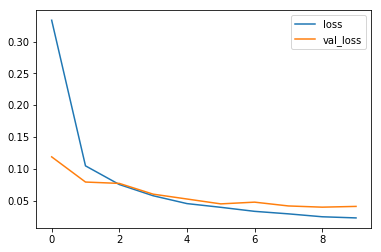

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

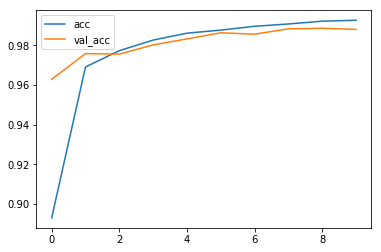

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 975    0    2    0    0    0    2    1    0    0]
 [   0 1129    1    1    0    0    1    3    0    0]
 [   0    0 1019    1    1    0    0    8    3    0]
 [   0    0    2 1001    0    3    0    2    0    2]
 [   0    0    1    0  965    0    2    3    1   10]
 [   0    0    0    8    0  881    1    2    0    0]
 [   3    2    0    1    2    2  948    0    0    0]
 [   0    4    1    1    0    0    0 1019    1    2]
 [   2    0    2    5    0    9    0    2  954    0]
 [   0    0    0    6    5    3    0    2    3  990]]


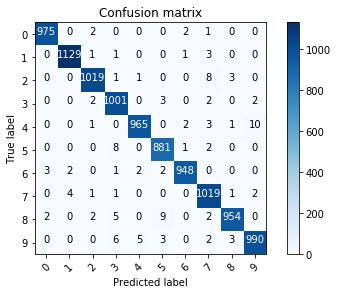

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

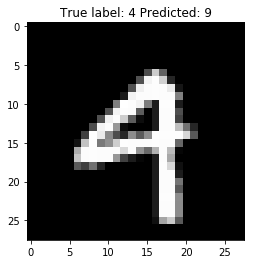

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));